In [80]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [81]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [82]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [83]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [84]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [85]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [86]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [87]:
# Create our session (link) from Python to the DB
link = Session(engine)

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
recent_date = link.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

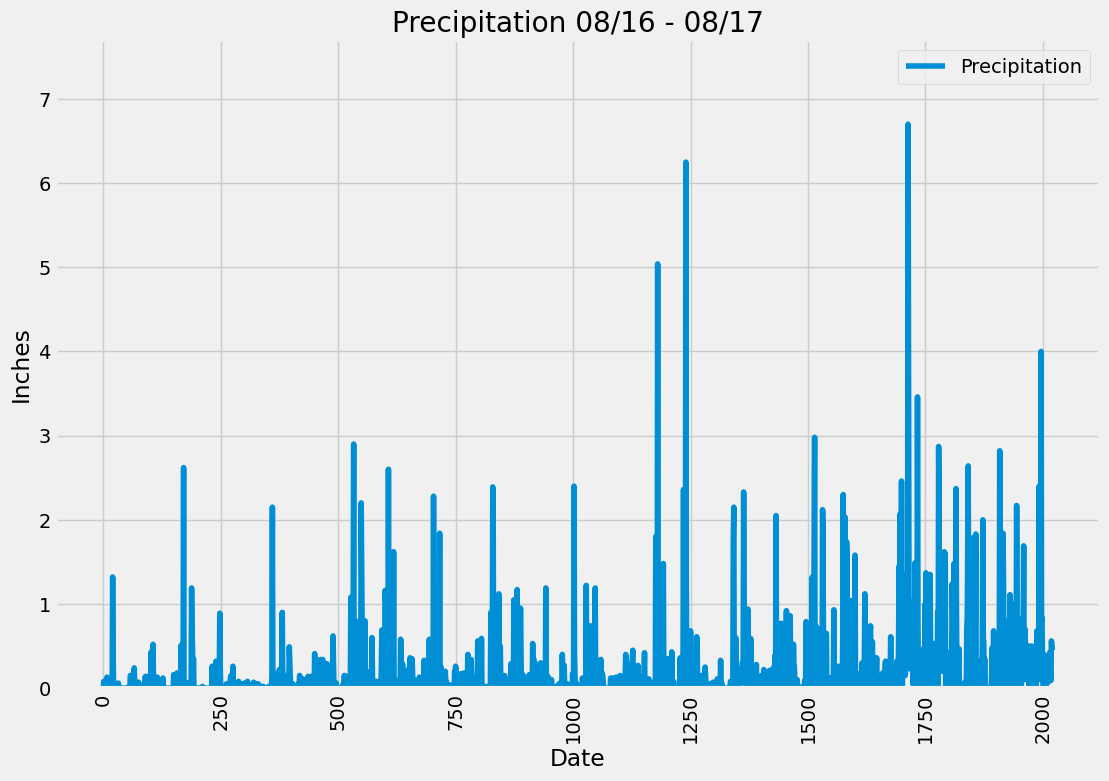

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017,8, 23)
# Calculate the date one year from the last date in data set.
last_year = recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
query = link.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(query).rename(columns = {'prcp': 'Precipitation'})


# Sort the dataframe by date
measurement_df.sort_values(by = ["date"], ascending=True)
measurement_df = measurement_df.dropna()
measurement_df = measurement_df.reset_index(drop=True)



# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(title = 'Precipitation 08/16 - 08/17', figsize = (12, 8), rot = 90)
plt.legend(loc = 'upper right')
plt.ylim(0,7.7)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [91]:
# Design a query to calculate the total number of stations in the dataset
link.query(func.count(station.station)).all()

[(9,)]

In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = link.query(measurement.station,
                func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
most_active
#most_active = [measurement.station, func.count(measurement.station)]
#active_stations = link.query(*most_active).group_by(measurement.station).\
                  #order_by(func.count(measurement.station)desc()).first().station
#link.query(*most_active).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = [measurement.station, 
              func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)]
station_temps = link.query(*temperature).filter_by(station = "USC00519281").all()
station_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

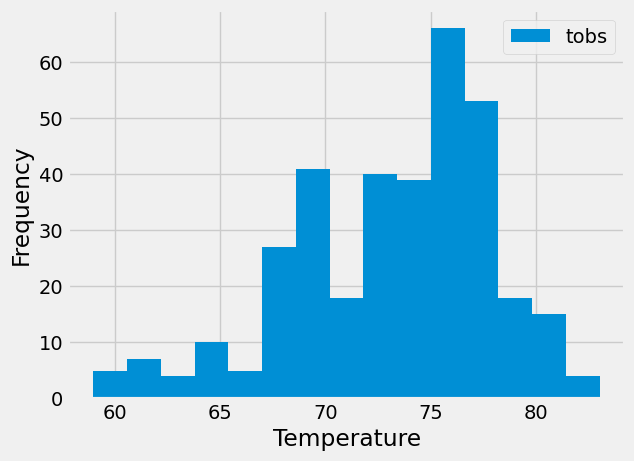

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp = link.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= last_year).all()
last_year_temp_df = pd.DataFrame(last_year_temp)

last_year_temp_df.plot(kind = "hist", bins = 15)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [95]:
# Close Session
session.close()

TypeError: Session.close() missing 1 required positional argument: 'self'